<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd
import numpy as np

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

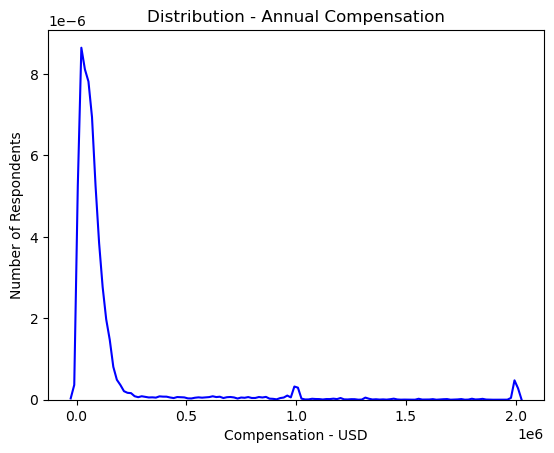

In [5]:
sns.distplot(df['ConvertedComp'], hist=False, color="b")

plt.title('Distribution - Annual Compensation')
plt.xlabel('Compensation - USD')
plt.ylabel('Number of Respondents')

plt.show()
plt.close()

Plot the histogram for the column `ConvertedComp`.


Text(0, 0.5, 'Number of Respondents')

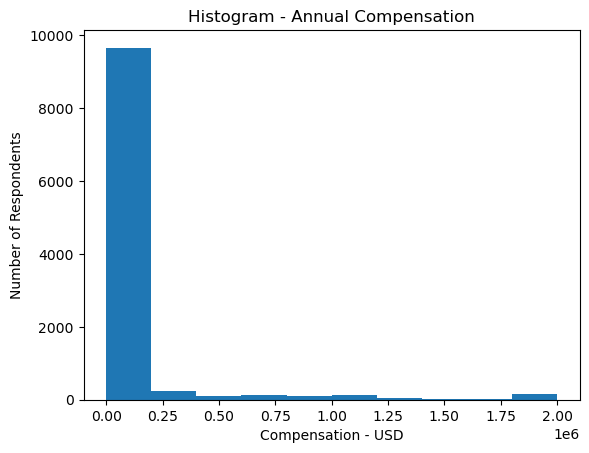

In [76]:
df['ConvertedComp'].plot(kind = 'hist')
plt.title('Histogram - Annual Compensation')
plt.xlabel('Compensation - USD')
plt.ylabel('Number of Respondents')

What is the median of the column `ConvertedComp`?


In [39]:
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [40]:
# your code goes here
df['Gender'].value_counts() #10,480 repondents

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [61]:
df.loc[df['Gender'] == "Woman", 'ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


In [6]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Boxplot - Age')

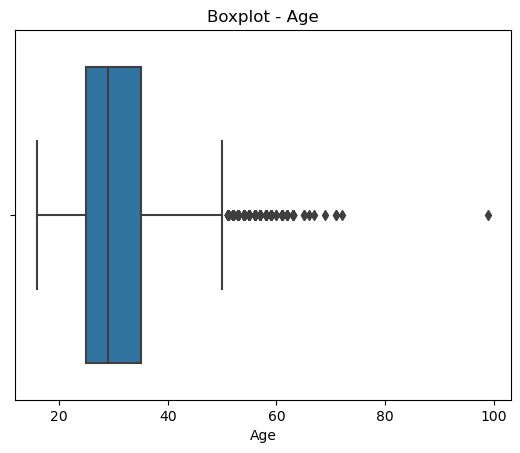

In [81]:
sns.boxplot(data=df, x='Age')
plt.title('Boxplot - Age')

**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


Plot a histogram of the column `Age`.


(array([ 116., 1980., 6213., 1492.,  680.,  406.]),
 array([15, 20, 25, 35, 40, 45, 50]),
 <BarContainer object of 6 artists>)

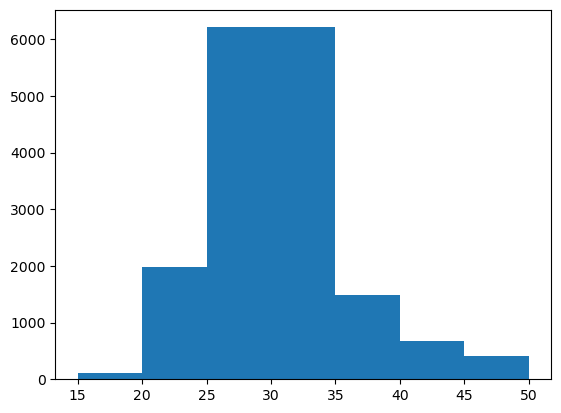

In [10]:
plt.hist(df['Age'], bins=[15,20,25,35,40,45,50])
plt.title('Histogram - Age')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


Text(0.5, 1.0, 'Boxplot - Annual Compensation')

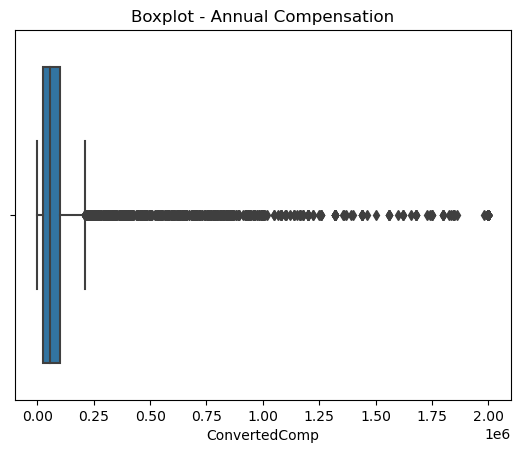

In [85]:
sns.boxplot(data=df, x='ConvertedComp')
plt.title('Boxplot - Annual Compensation')

In [15]:
# Yes, in the box plot we find that most outliers are after $250,000.
# We see below that the max comp is $2M while the mean is $131,596, large difference.
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [16]:
df['ConvertedComp'].median()

57745.0

In [17]:
# Select the first quantile
q1 = df['ConvertedComp'].quantile(.25)
q1

26868.0

In [18]:
# Select the third quantile
q3 = df['ConvertedComp'].quantile(.75)
InterQ=q3-q1
InterQ

73132.0

Find out the upper and lower bounds.


In [19]:
#Lower bound: anything below is an outlier
# It's negative because the min value is 0, we can take the lower bound as 0.
LB = q1 - (1.5 * InterQ)
LB

-82830.0

In [20]:
# Upper bound: anything above is an outlier
UB = q3 + (1.5 * InterQ)
UB

209698.0

Identify how many outliers are there in the `ConvertedComp` column.


In [21]:
df[(df['ConvertedComp'] > UB) | (df['ConvertedComp'] < LB)].shape[0]

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [22]:
df_filtered = df[(df['ConvertedComp'] <= UB) & (df['ConvertedComp'] >= LB)]
df_filtered.shape[0]

9703

In [124]:
# 11398-9703=1695 :879 were outliers dropped, the difference were nulls that were also dropped when applying formula above.
len(df)

11398

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [135]:
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
